## **Week 1 Code Sample Assignment**
Please modify the aging buckets high/low amounts in order to get a different result for the output. Upload your modified notebook to canvas for the first assignment. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
# this cell will be to generate the synthetic data 

# set the number of departments/units
n_units = 10
business_units = [f"Unit {i+1}" for i in range(n_units)]
np.random.seed(50)  # for reproducibility - helps with random data generation

# define the aging buckets for the receivables and monetary amounts
aging_buckets = {
    'Current': (100000, 10000000),
    '1-30 Days': (20000, 20000000),
    '31-60 Days': (20000, 8000000),
    '61-90 Days': (20000, 9000000),
    '91-120 Days': (100000, 7000000),
    '121-365': (20000, 6000000),
    'Over 365 Days': (2000, 4000000),
    'Unapplied Payments': (-20000, -8000),
    # the are the number of invoices per bucket
    '# of Invoices': (300, 25000)
}

# generate the data from parameters
data = {'Business Unit': business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units), 2)

df = pd.DataFrame(data)
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days','91-120 Days', '121-365', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']


# show the dataframe
df.head()


,Business Unit,Current,1-30 Days,31-60 Days,61-90 Days,91-120 Days,121-365,Over 365 Days,Unapplied Payments,# of Invoices,Total Due,Net Amount Due
0,Unit 1,4996556.29,6943893.27,4067329.31,8443376.70,4808264.47,1783678.68,557562.36,-11808.41,20107,31600661.08,31588852.67
1,Unit 2,2358022.73,7048261.05,4202345.95,6432552.51,6158588.49,3708053.86,451004.12,-8428.69,16450,30358828.71,30350400.02
2,Unit 3,2629191.85,2926427.79,7425447.40,6599534.73,5597349.12,2817720.45,1912184.29,-17276.46,20012,29907855.63,29890579.17
3,Unit 4,4023666.11,19453840.40,4579557.09,4166494.13,3080815.51,1546926.71,2162104.32,-11407.79,16740,39013404.27,39001996.48
4,Unit 5,3835419.47,18185385.19,5353333.80,8383336.82,6433359.71,5037195.41,3832368.05,-10426.88,22302,51060398.45,51049971.57


In [14]:
# calculate present value of the receivables to show how much money we are losing
discount_rate = 0.10  # 10% discount rate

# map the buckets to months
aging_buckets = {
    'Current': 0,
    '1-30 Days': 1,
    '31-60 Days': 2,
    '61-90 Days': 3,
    '91-120 Days': 4,
    '121-365': 8,
    'Over 365 Days': 18,
}

# calcualte the present value for each bucket
for bucket, months in aging_buckets.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** (months))

# calculate the total present value
df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_buckets]].sum(axis=1)


#show results of present value
df[['Business Unit', 'Total Due', 'Total PV']]

,Business Unit,Total Due,Total PV
0,Unit 1,31600661.08,2.523074e+07
1,Unit 2,30358828.71,2.308877e+07
2,Unit 3,29907855.63,2.186612e+07
3,Unit 4,39013404.27,3.183885e+07
4,Unit 5,51060398.45,3.852360e+07
5,Unit 6,34199502.83,2.795406e+07
6,Unit 7,27805223.21,2.116385e+07
7,Unit 8,40451081.65,3.185171e+07
8,Unit 9,40964052.37,3.155145e+07
9,Unit 10,24669832.62,2.021833e+07


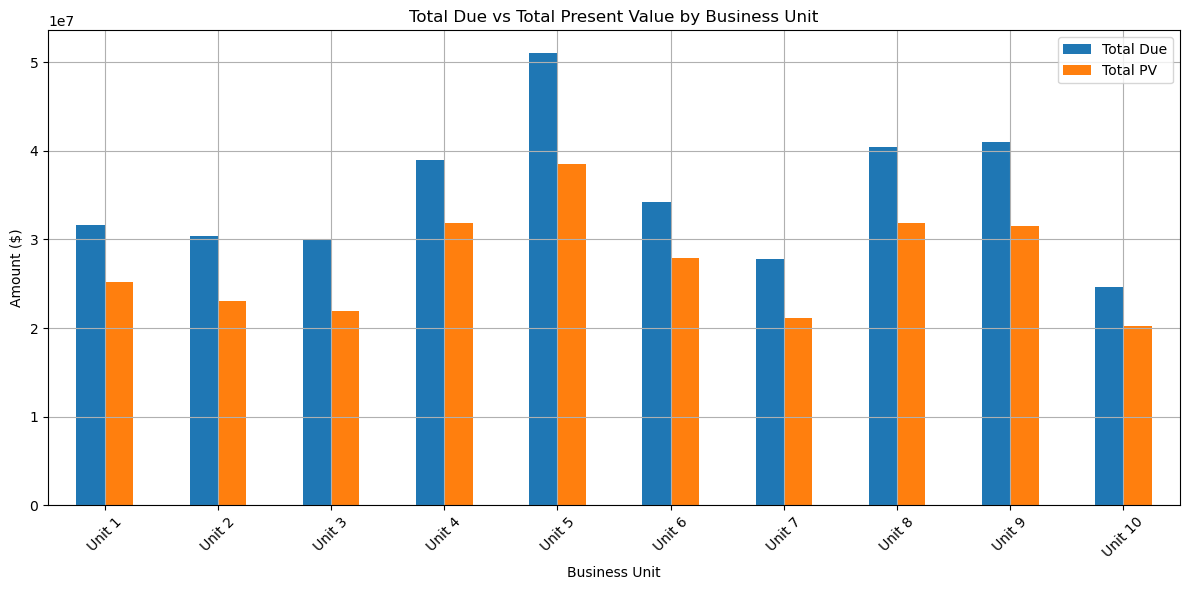

In [16]:
# lets plot and print the results
df.plot(x= 'Business Unit', y=['Total Due', 'Total PV'], kind='bar', figsize=(12, 6), title='Total Due vs Total Present Value by Business Unit')
#plt.title('Total Due vs Total Present Value by Business Unit')
plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()